## **A. Inferential Statistics**

Inferential statistics are used to make conclusions/educated guesses/inferences about a population based on a data collected from a sample of the population.

This is important because in real world scenarios, we rarely have access to all the data. We rely on small slices and try to say something meaningful about the bigger picture.

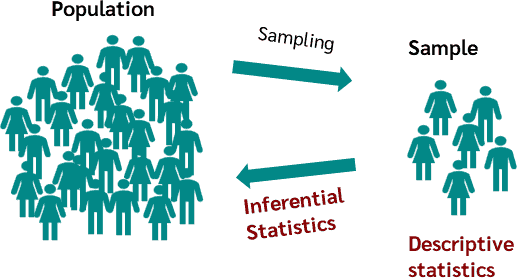

[source](https://datatab.net/tutorial/descriptive-inferential-statistics)

**Key Definitions**

***Population***: the complete set of individuals, items, or data points that a researcher wants to study. It's the group to which the research findings are intended to be generalized.

***Sample***: a subset of the population that is selected for study.It is chosen to be representative of the population to allow for inferences about the larger group.

But how do we responsibly use sample data to draw conslusions about the entire population and avoid jumping into conclusions?

> 1. **Estimation using confidence intervals**
> 2. **Hypothesis testing**

Underlying these two is the concept of **probability** which helps us deal with uncertainty.

We will discuss Probability in a later section.

### **1. Estimation using Confidence Intervals**

We estimate an unknown value (called a parameter) e.g. a population mean, based on a known sample statistic - sample mean.

But here’s the catch:
Any sample we take is just one possibility. A different sample might give us a different mean.

So rather than give just one number, we give a range of values that we believe the true value might fall into. That’s a confidence interval.

> **A confidence interval (CI)** is a *range* of values, derived from a sample, in which the true mean of the population lies with a certain probability.

Think of it like saying: “I’m not 100% sure what the true mean is, but based on my data, I’m 95% confident it’s between x<sub>1</sub> and x<sub>2</sub>.”


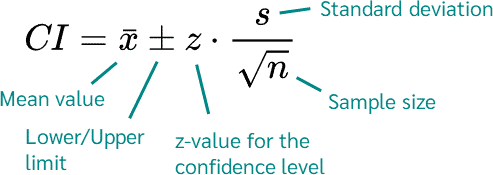

                 
[confidence interval formula](https://datatab.net/tutorial/confidence-interval)

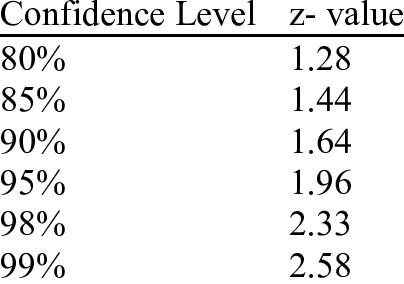

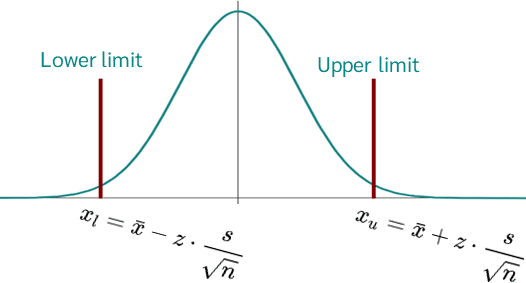

[confidence interval lower and upper bounds](https://datatab.net/tutorial/confidence-interval)

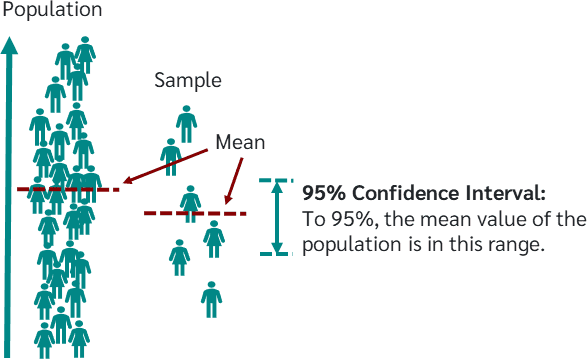

[confidence interval illustration](https://datatab.net/tutorial/confidence-interval)

In Python, we use `scipy.stats.norm.interval`

In [ ]:
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Load the penguins dataset and drop missing values. Assume this dataset is your population
penguins = sns.load_dataset("penguins").dropna(subset=["body_mass_g"])
population = penguins["body_mass_g"].values

# Step 1: Get the "true" population mean
true_mean = np.mean(population)

# Step 2: Take one random sample of size 15
np.random.seed(42)
sample_size = 15
sample = np.random.choice(population, size=sample_size, replace=False)

# Step 3: Compute sample mean and sample standard deviation
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

# Step 4: Compute 95% confidence interval using the t-distribution
confidence = 0.95
df = sample_size - 1
t_crit = stats.t.ppf(1 - (1 - confidence) / 2, df) # t_crit is the t-score which is used instead of z-score when the sample size is less than 30.
margin_error = t_crit * (sample_std / np.sqrt(sample_size))

lower = sample_mean - margin_error
upper = sample_mean + margin_error

# Step 5: Print the results
print(f"True population mean: {true_mean:.2f} grams")
print(f"Sample mean: {sample_mean:.2f} grams")
print(f"95% Confidence Interval: ({lower:.2f}, {upper:.2f}) grams")


True population mean: 4201.75 grams
Sample mean: 4393.33 grams
95% Confidence Interval: (4024.64, 4762.03) grams


We took just one sample of 15 penguins. The average body mass in that sample was 4393.33 grams.

But we don’t stop there — we give a range: we’re 95% confident the true average for the whole population is between 4024.64 and 4762.03 grams.


And the actual population mean — 4201.75 grams — falls within our interval. This is the kind of estimation we do in data science.

### **2. Hypothesis Testing**

Hypothesis testing is the second main tool in inferential statistics, alongside confidence interval estimation.

> **Hypothesis testing is a statistical method used to determine whether there is enough evidence in a sample to support or reject a specific claim about a population.**

While confidence interval estimation gives us a range of plausible values, hypothesis testing helps us evaluate specific claims about population parameters.

Instead of providing a range of values for the population mean of penguin body mass, we start from a question e.g.:


> "Is the average penguin body mass 4000 grams?"


#### **2.1. Null and Alternative Hypothesis**

Every hypothesis test begins with two competing statements about the population:

- Null hypothesis H<sub>0</sub> - the statement we are trying to disprove
    - a statement of no effect, no change, or no difference: "**the difference is not statistically significant**"
    - Examples:
        - H₀: The average penguin body mass is not different from 4000 grams (mean = 4000)
        - H₀: The new teaching method has no effect on scores
        - H₀: There is no difference between group A and group B
- Alternative hypothesis H<sub>1</sub> - the statement we accept if we find sufficient evidence to disprove the null hypothesis H<sub>0</sub>
    - proposes that there is a significant effect, change or difference
        - H₁: The average penguin body mass is different from 4000 grams (mean != 4000)
        - H₁: The new teaching method has an effect on scores
        - H₁: There is a difference between group A and group B

> **In a hypothesis testing, only the null hypothesis can be tested; the goal is to find out whether the null hypothesis is rejected or not.**


#### **2.2. The Hypothesis Testing Process**

1. State the hypotheses
    - Null hypothesis (H₀): the default claim (e.g. mean = 4000)
    - Alternative hypothesis (H₁ or Hₐ): what you want to test (e.g. mean ≠ 4000)
2. Choose a significance level, alpha (α)
    - the threshold for how much error you're willing to accept
    - usually 0.05
    - determines the threshold for statistical significance, i.e. if there is enough evidence to reject the null hypothesis
3. Conduct the statistical test (e.g. t-test, chi-square test, ANOVA) and compute a test statistic
    - This is where you choose and apply a statistical test to compute the test statistic
    - Test statistic show how far your sample result is from what H₀ predicts
    - Examples of test statistics:
        - z-statistic
        - t-statistic
        - chi-square statistic
        - F-statistic

4. Calculate the p-value
5. Make a decision
    - p ≤ α: strong evidence against the null hypothesis, reject the null hypothesis.
    - p-value > α: weak evidence against the null hypothesis, accept the null hypothesis.


#### **2.3. Selecting the Right Statistical Test**

The flow chart below is a guidance on how to select the statistical test to usewith any data.


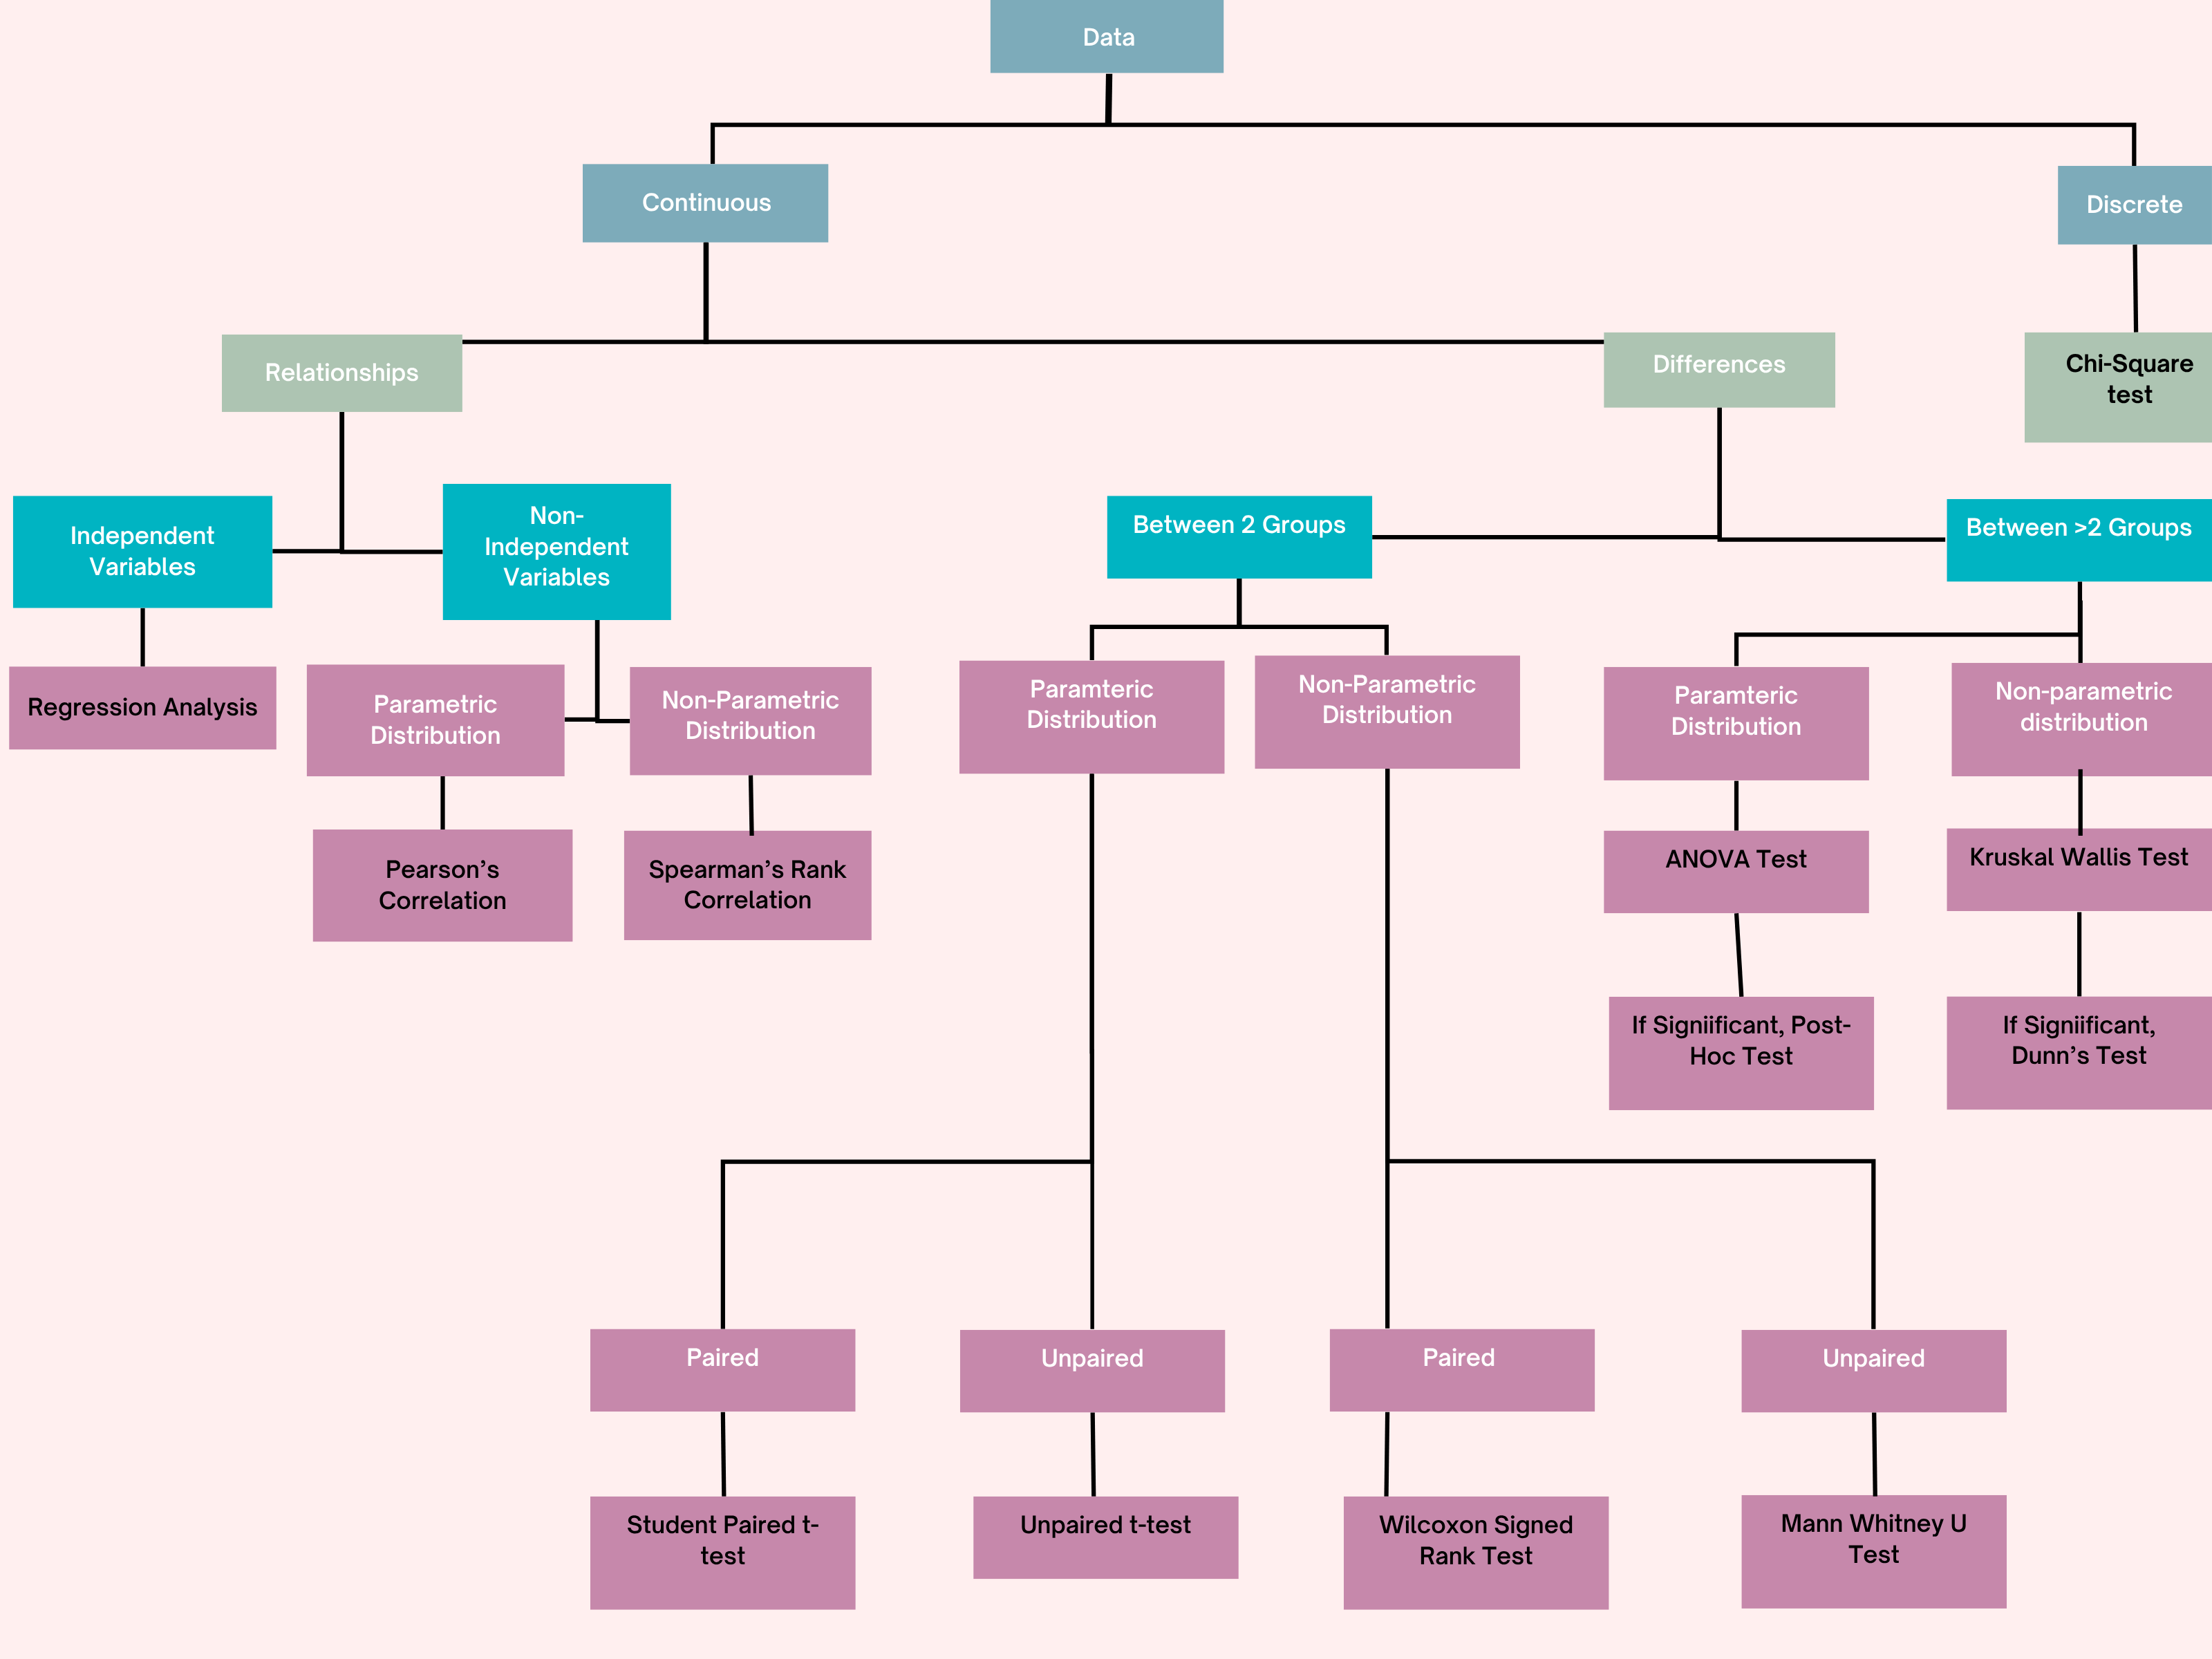

Some important terms

Parametric Distribution:
- Data is normally distributed (use Shapiro walk test to test for normality)
- Equal variances (use Levene’s, Bartlett’s tests for equal variance)

Paired data: measurements from the same subjects at different times under diffenrent conditions e.g. test scores of a class of students in the first semester vs in the second semester

Unpaired data: measurements from completely different groups e.g. test scores from students in one class vs the scores from students in another class.

**Error Types in hypothesis testing**

- Type 1 error: occurs when a true null hypothesis is incorrectly rejected
- Type 2 errors: occurs when a false null hypothesis is not rejected


## **B. Probability and Statistics**

So far we've discussed the use of two types of inferential statistics: hypothesis testing and estimation using confidence intervals.

What underpins these concepts is the underlying Probability, as it helps us **quantify uncertainty**.

> Probability helps us model randomness and draw conclusions in a principled way, and gives mathematical meaning to the tools of inferential statistics.



Probability is what allows us to:

- **Model uncertainty**: Data is noisy — probability helps us reason through it
- **Understand distributions**: Confidence intervals and hypothesis tests depend on the shape and spread of data
- **Compute p-values**: Every p-value is the result of a probability calculation
- **Build machine learning models**: From Naive Bayes to logistic regression, probability is at the core

The concepts we will explore in Probability are:
- Sample space
- Random variables
- Types of events (independent, joint, conditional)
- Discrete vs. continuous probability distributions
- The Central Limit Theorem (key to understanding sampling variability)
- Bayes’ Theorem (updating our beliefs with new data)

### **1. Sample Space: a Set of all possible outcomes**

- At its core, probability is built on set theory, and the sample space is the foundational set in any probability problem.

- A sample space is just a set that contains all possible outcomes of an experiment.

Example sample spaces:

- Rolling a die once:

S = {1, 2, 3, 4, 5, 6}

- Tossing a coin once?

S = {H, T}

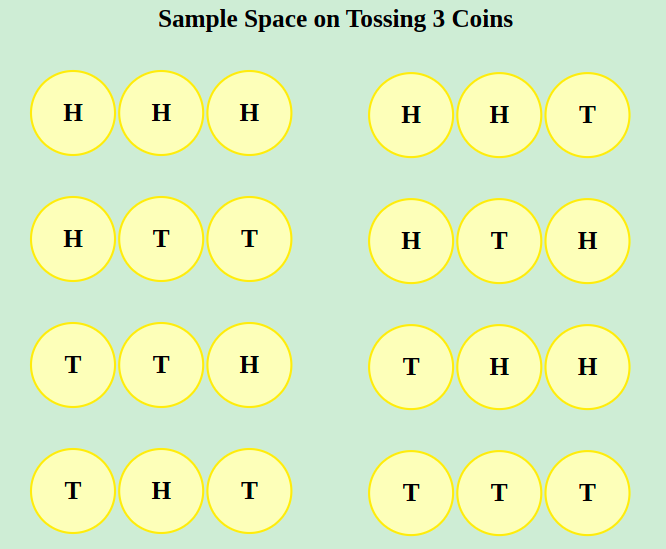

[source](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.geeksforgeeks.org%2Fmaths%2Fsample-space-probability%2F&psig=AOvVaw2esZ_2UJukEWjEsjs7XIXJ&ust=1751621585917000&source=images&cd=vfe&opi=89978449&ved=0CBcQjhxqFwoTCPCp1puxoI4DFQAAAAAdAAAAABAE)



- Nairobi's temperature?

S = {t ∈ ℝ}

- Gender of Data Science students

S = {Female, Male, Gender neutral}

- Age of Kenyans

S = {a ∈ ℝ | 0 ≤ a ≤ M}, M is the maximum age of any Kenyan

### **2. Events: A Subset of the Sample Space**

An event is defined as a subset of the sample space.

For example:

- In rolling a dice:
    - Event A: rolling an even number `→ A = {2, 4, 6}`
    - Event B: rolling a number > 3 `→ B = {4, 5, 6}`

- In selecting random athletes from the athletes dataset:
    - Event A: "Athletes who play Basketball"
    - Event B: "Athletes who are over 30 years old"

- In rolling three coins:
    - Event A: At least two heads `→ A = {HHH, HHT, HTH, THH}`
    - Event B: Only one tail `→ B = {HHT, HTH, THH}`


### **3. Set Operations in Probability**

We can now use set theory to combine or compare events.

e.g.

A ∪ B: athletes who play basketball or are over 30 (union)
A ∩ B: athletes who play basketball and ae over 30 (intersection)


Set theory operations directly translate into probability logic:

| Set Operation     | Meaning in Probability          | Example                           |
| ----------------- | ------------------------------- | --------------------------------- |
| $A \cup B$        | A **or** B (union)              | P(even **or** >3)                 |
| $A \cap B$        | A **and** B (intersection)      | P(even **and** >3)                |
| $A^c$ or $\sim A$ | Not A (complement)              | P(not even)                       |
| $\emptyset$       | Impossible event                | No outcome meets condition        |
| $S$               | Certain event (probability = 1) | Something in sample space happens |


Set theory helps us define joint events

So when you're defining probabilities, you're really measuring the **size of an event or a set of events** compared to the size of the sample space — all set theory in disguise. e.g

- P(A ∪ B)
- P(A)
- P(B)




**Event types**

- Independent events
- Joint events
- Conditional Events




### **4. Random Variables**

A **random variable** is a variable whose numerical value is determined by the outcome of a random phenomenon.

It assigns a numerical value to each possible outcome of a random experiment/phenomenon.

E.g.

- For rolling a die, the random variable X is the number that comes up on the die; values are 1, 2, 3, 4, 5, 6

Other random variables include:
- Gender (values are F -> 1, M -> 0)

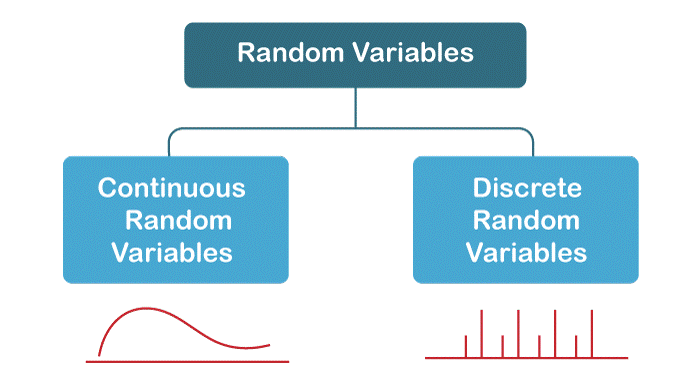

[source](https://www.google.com/url?sa=i&url=https%3A%2F%2Fblog.gopenai.com%2Fdiscrete-vs-continuous-demystifying-the-type-of-random-variables-2f10ee2db9d4&psig=AOvVaw323wvo_53V-Mlh2TGy2dwo&ust=1751622356199000&source=images&cd=vfe&opi=89978449&ved=0CBcQjhxqFwoTCND_34K0oI4DFQAAAAAdAAAAABAE)

#### **Types of Random Variables**

- Discrete random variables: takes countable, finite values, often integers. e.g.

    - Age(if we decide to only consider finite integers)
    - Sports played by athletes

- Continuous random variables: takes infinite number of values within a given range, often including decimals. e.g.
    - Age (if we include all possible values of age in years, months, days, etc)
    - Temperature

### **5. Probability Distribution**

A probability distribution is a mathematical function that describes the likelihood of different outcomes for a random variable.

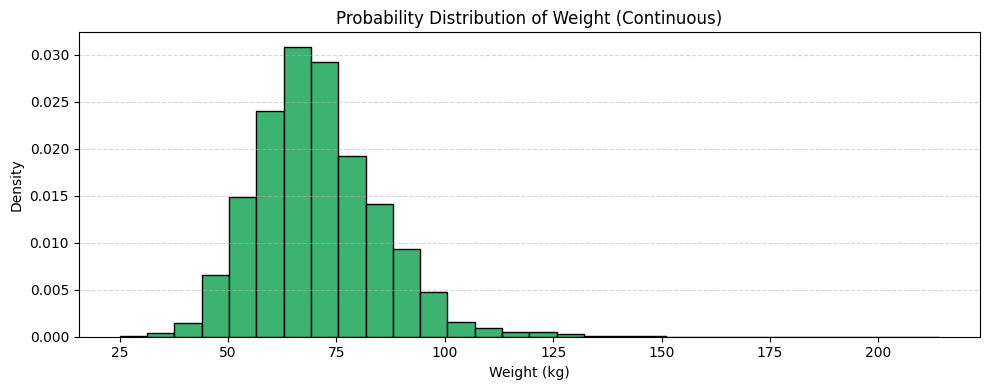

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
athletes = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-27/athlete_events.csv")

weights = athletes['Weight'].dropna()

plt.figure(figsize=(10, 4))
plt.hist(weights, bins=30, density=True, color='mediumseagreen', edgecolor='black')
plt.title("Probability Distribution of Weight (Continuous)")
plt.xlabel("Weight (kg)")
plt.ylabel("Density")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

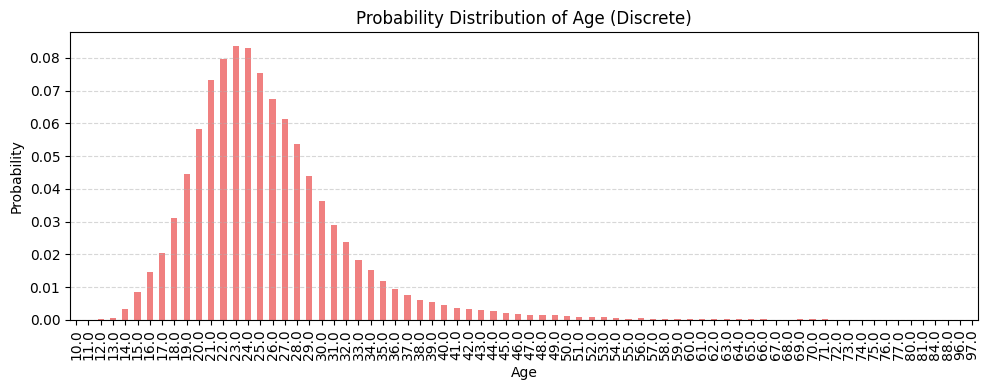

In [ ]:
age_counts = athletes['Age'].value_counts().sort_index()
age_probs = age_counts / age_counts.sum()
plt.figure(figsize=(10, 4))
age_probs.plot(kind='bar', color='lightcoral')
plt.title("Probability Distribution of Age (Discrete)")
plt.xlabel("Age")
plt.ylabel("Probability")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### **6. The Central Limit Theorem (CLT)**



> The **Central Limit Theorem** says:
> “If you take many random samples and compute their means, those means will form a normal distribution — even if the original data is not normally distributed.”

This explains why **confidence intervals** work.
📌 Remember when we said:

> “Take a sample, find its mean. Put it back. Take another. Find its mean...”
> That’s **CLT** in action!



**Let’s Demonstrate CLT with Athlete Weights**

We’ll simulate sampling:



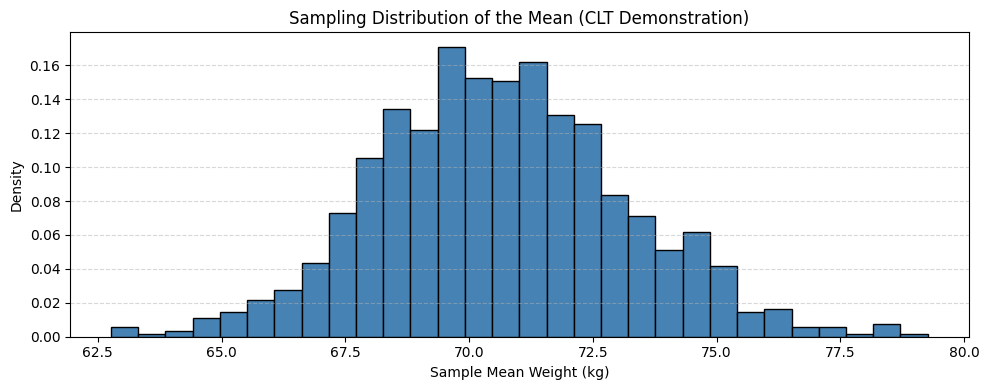

In [ ]:

import numpy as np

# Drop missing weights and convert to array
weights = athletes['Weight'].dropna().values

# Take 1000 samples of size 30, store each sample mean
sample_means = [np.mean(np.random.choice(weights, size=30, replace=True)) for _ in range(1000)]


### 📊 Plot the Distribution of Sample Means


plt.figure(figsize=(10, 4))
plt.hist(sample_means, bins=30, density=True, color='steelblue', edgecolor='black')
plt.title("Sampling Distribution of the Mean (CLT Demonstration)")
plt.xlabel("Sample Mean Weight (kg)")
plt.ylabel("Density")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




✅ **Key Insight**: Even if the original weights are slightly skewed, the **sampling distribution of the means becomes approximately normal**.

This is **why we use the normal distribution in confidence intervals**.

### **7. Bayes’ Theorem for Conditional Probability**



> Bayes’ Theorem helps us **update our belief** about something when new data comes in.


Suppose we believe:

* About 10% of Olympic athletes are gymnasts (our **prior belief**).

Now we learn:

* 70% of athletes who are **under 18** are gymnasts (this is **new evidence**).

So if we meet a random athlete **under 18**, Bayes helps us update:

> "What is the probability they’re a gymnast **given** they’re under 18?"



**Simple Example from Dataset**

Let’s estimate:

* P(Gymnast)
* P(Under 18)
* P(Under 18 | Gymnast)
  Then use Bayes to get:

> **P(Gymnast | Under 18)**


In [ ]:

df = athletes.dropna(subset=['Age', 'Sport'])

# A: Is Gymnast
df['is_gymnast'] = df['Sport'] == 'Gymnastics'
# B: Is under 18
df['is_under18'] = df['Age'] < 18

# Probabilities
p_gymnast = df['is_gymnast'].mean()
p_under18 = df['is_under18'].mean()
p_under18_given_gymnast = df[df['is_gymnast']]['is_under18'].mean()

# Bayes’ Theorem
p_gymnast_given_under18 = (p_under18_given_gymnast * p_gymnast) / p_under18

print(f"P(Gymnast | Under 18) ≈ {p_gymnast_given_under18:.2f}")

📌 **Bayes' Insight**:

> Our belief that an under-18 athlete is a gymnast is now **updated** using observed evidence.


**Why This All Matters**

| Concept                  | Why It Matters                                                |
| ------------------------ | ------------------------------------------------------------- |
| Probability Distribution | Describes how values of a variable are spread out             |
| Discrete vs. Continuous  | Helps us model age vs. height/weight differently              |
| Central Limit Theorem    | Justifies using normal distribution for sample means          |
| Bayes’ Theorem           | Lets us **revise beliefs** with new data — key for inference! |

## **C. Time Series Analysis**

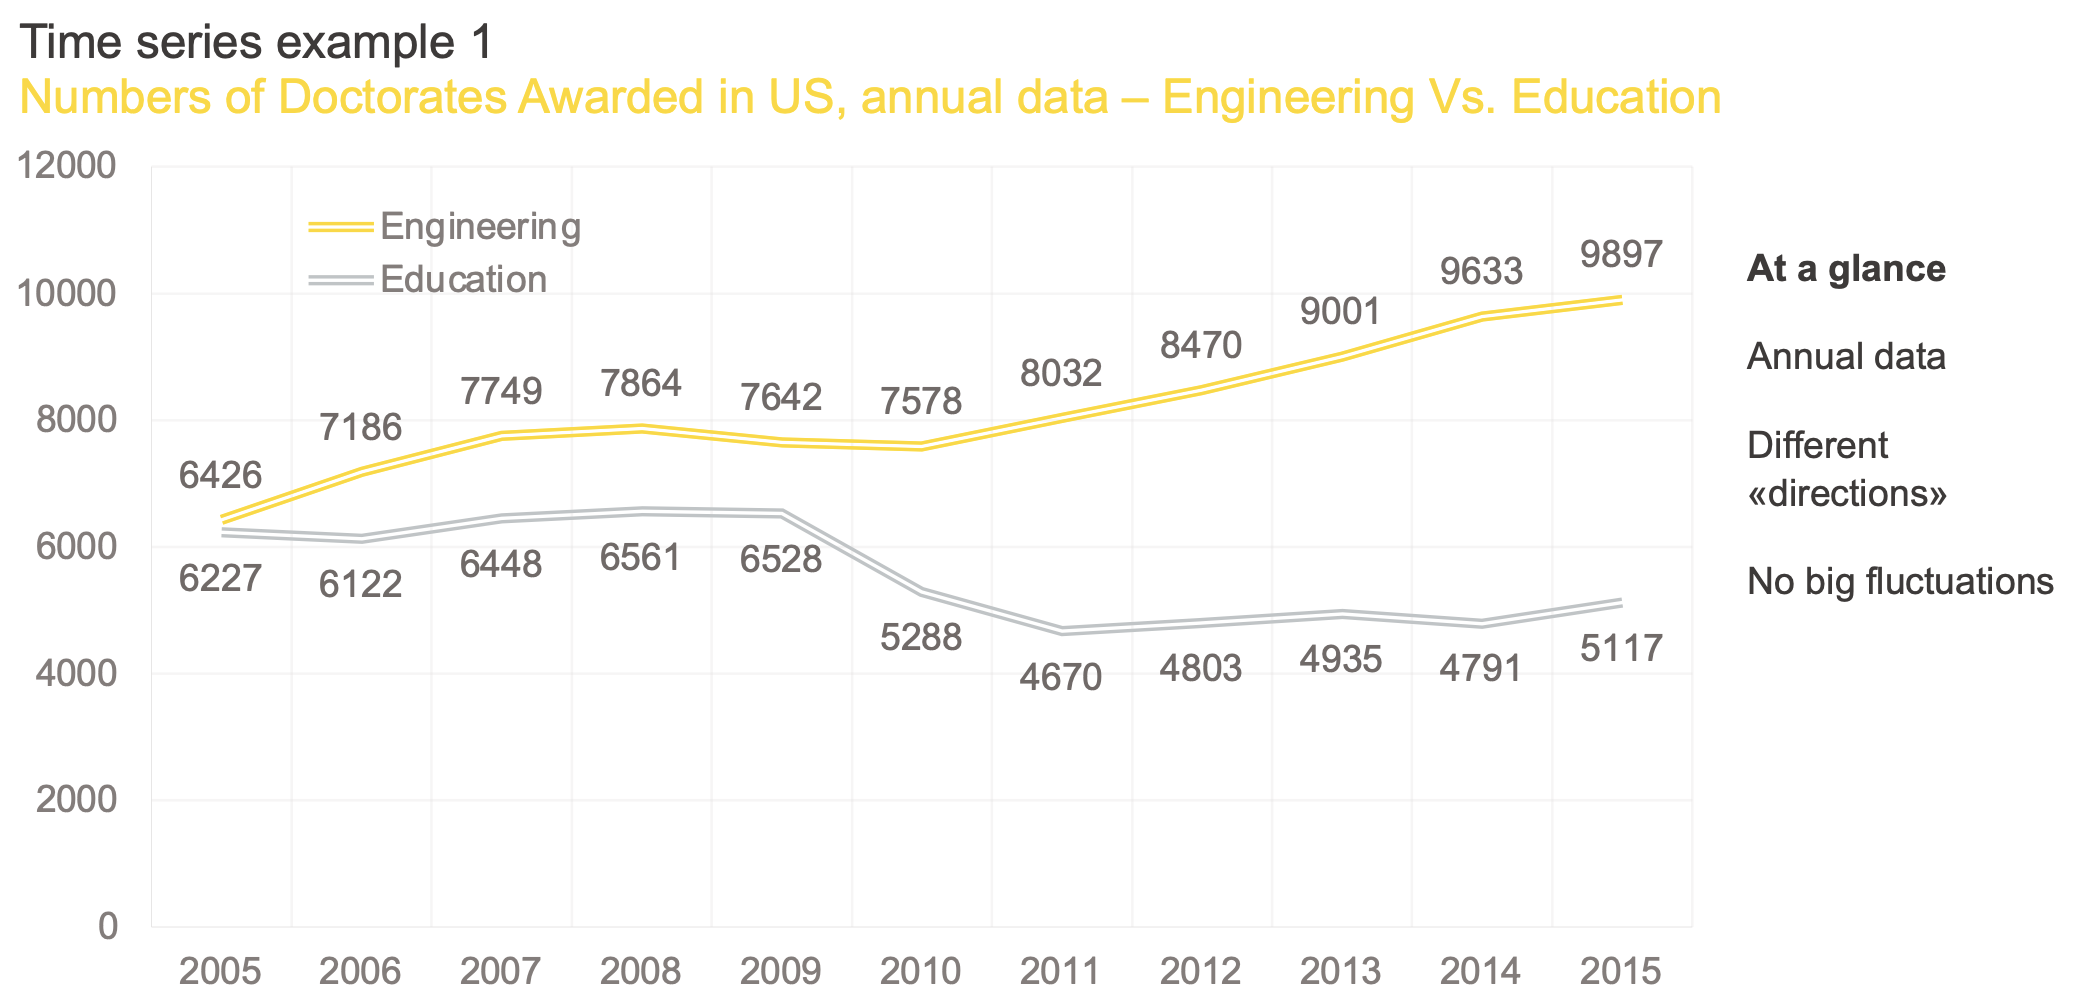


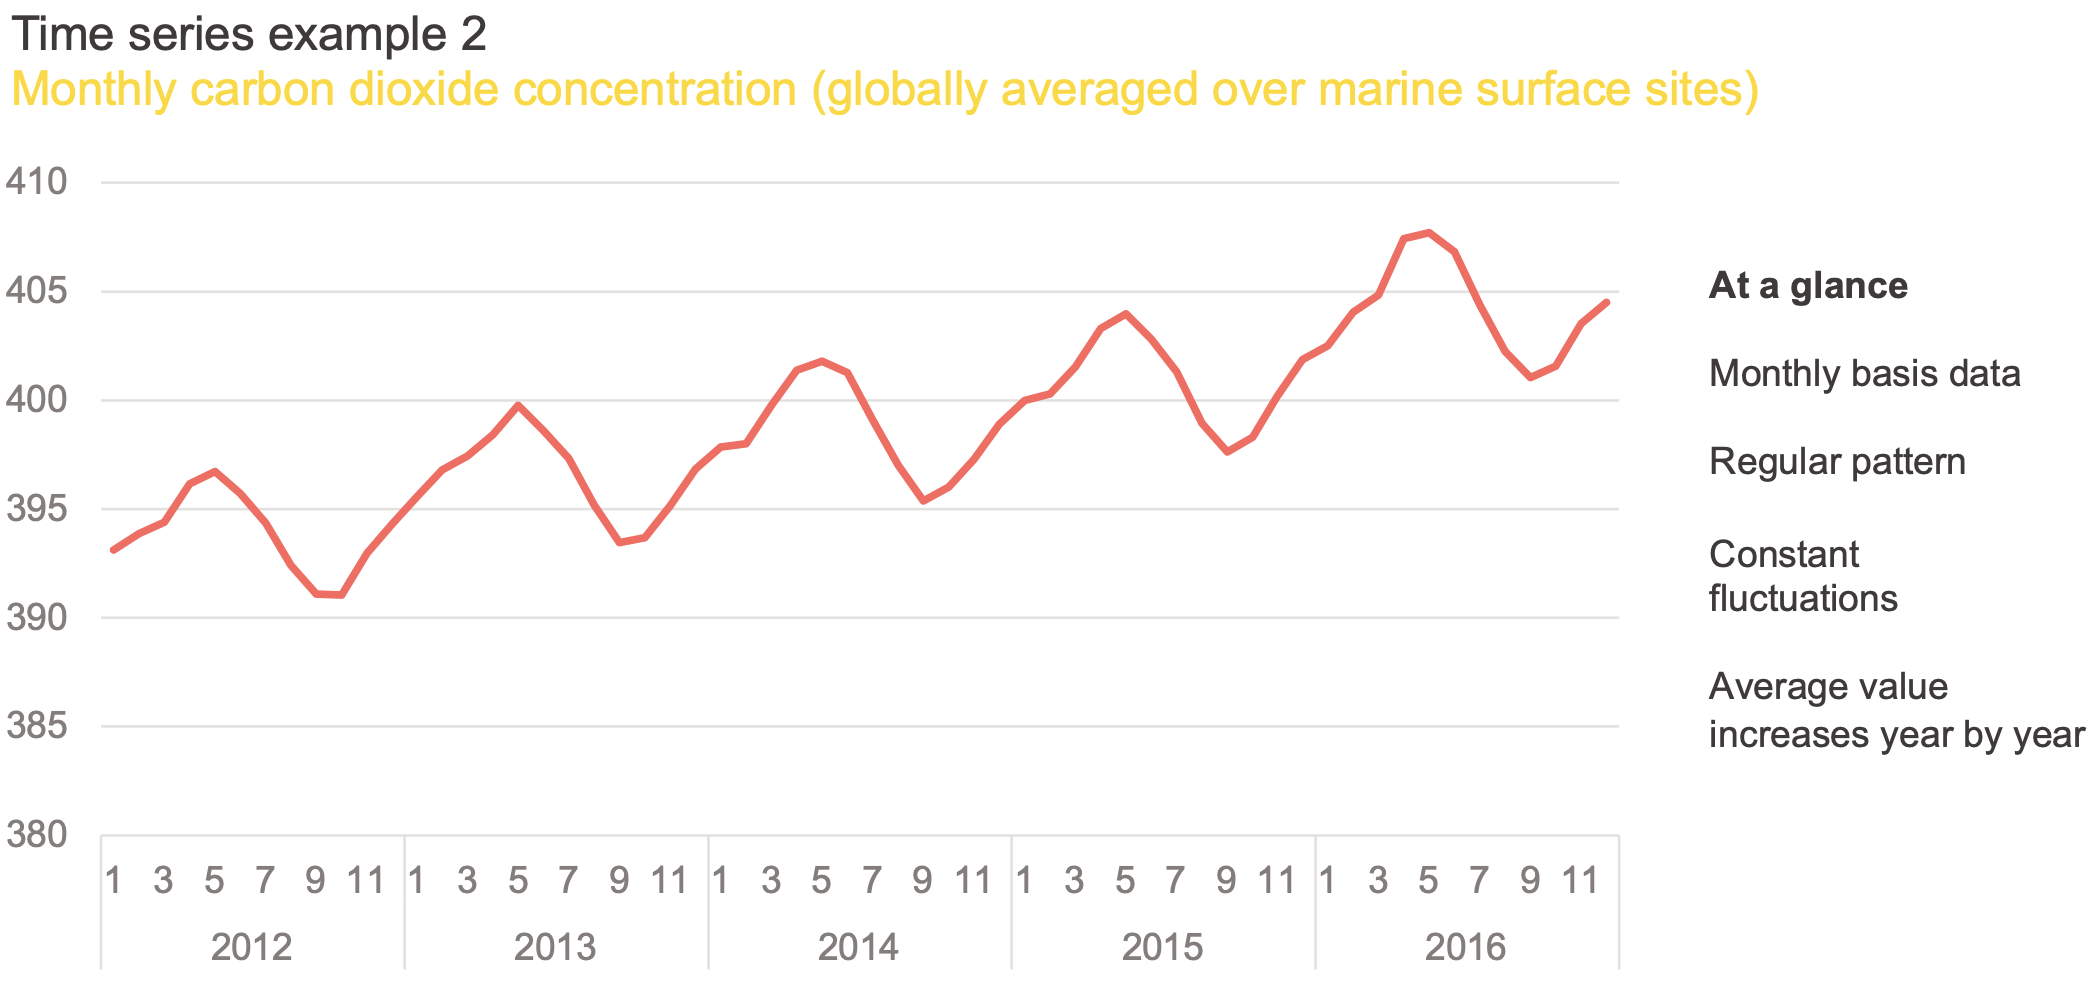

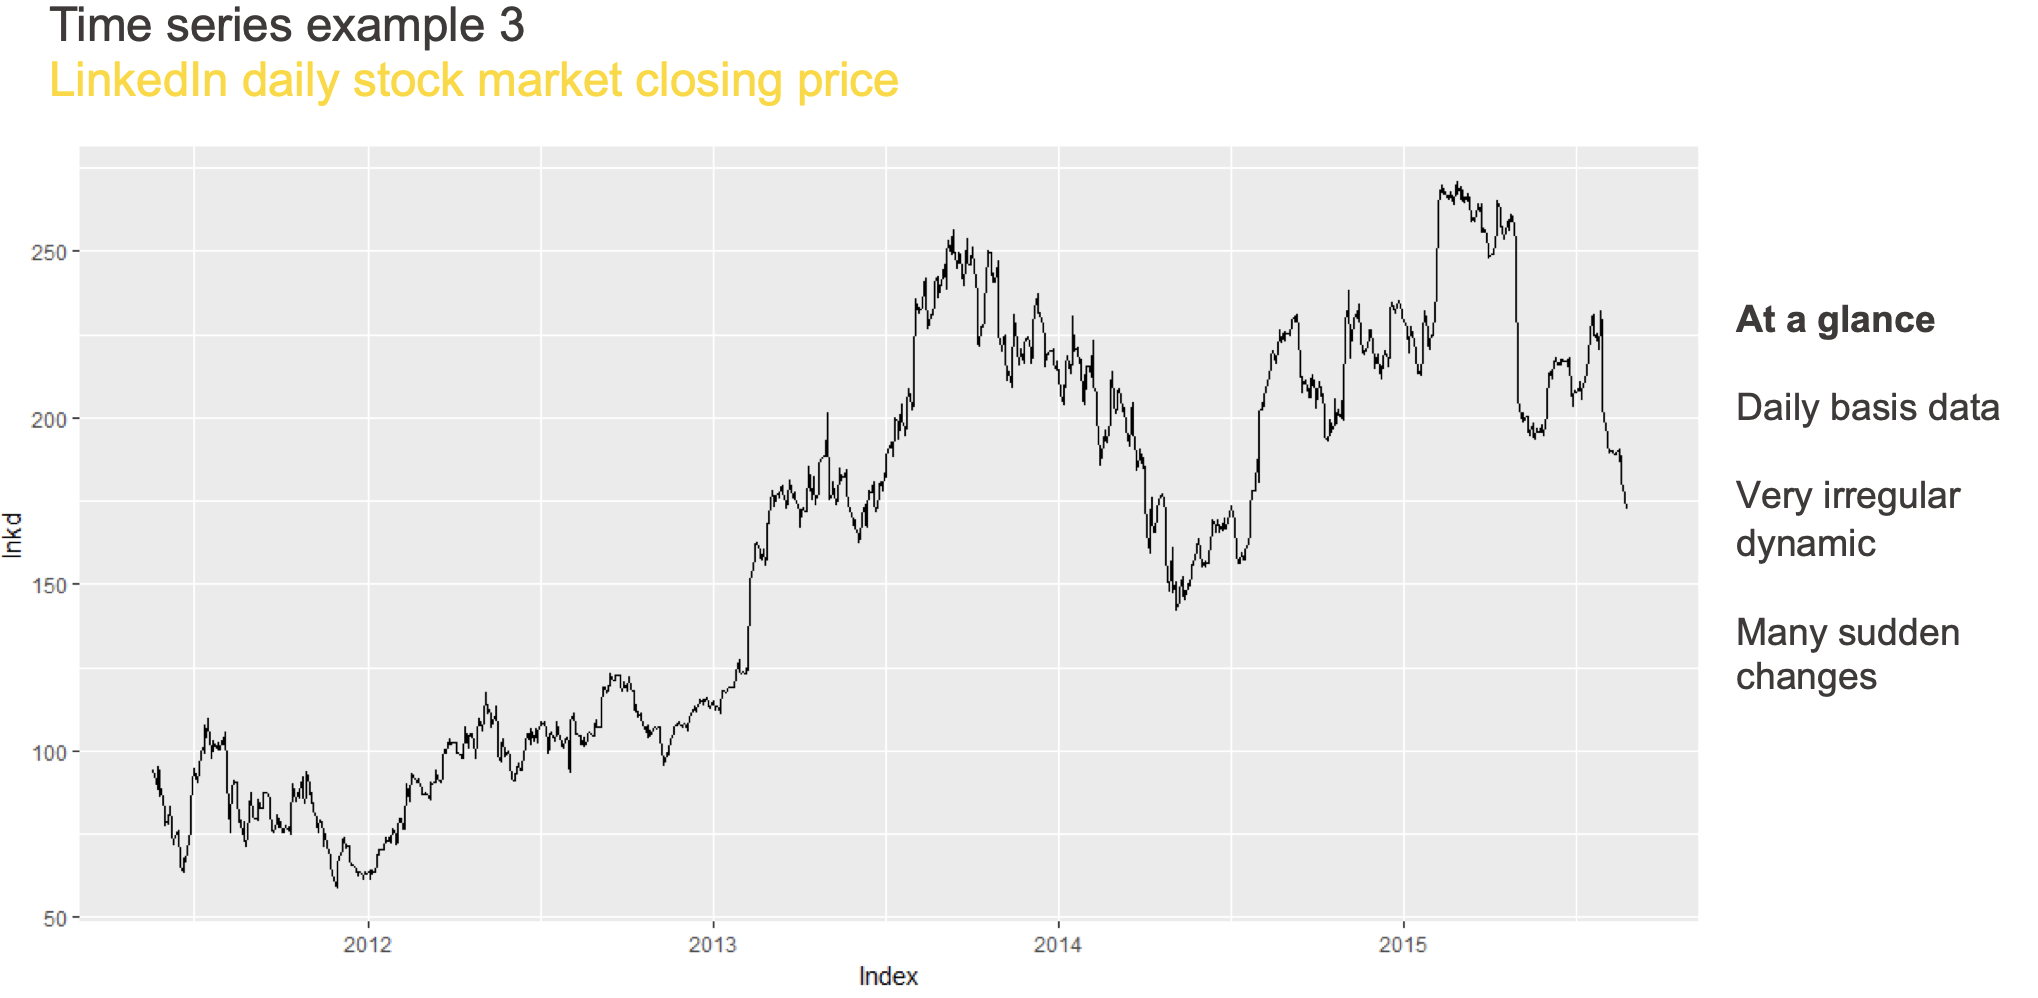

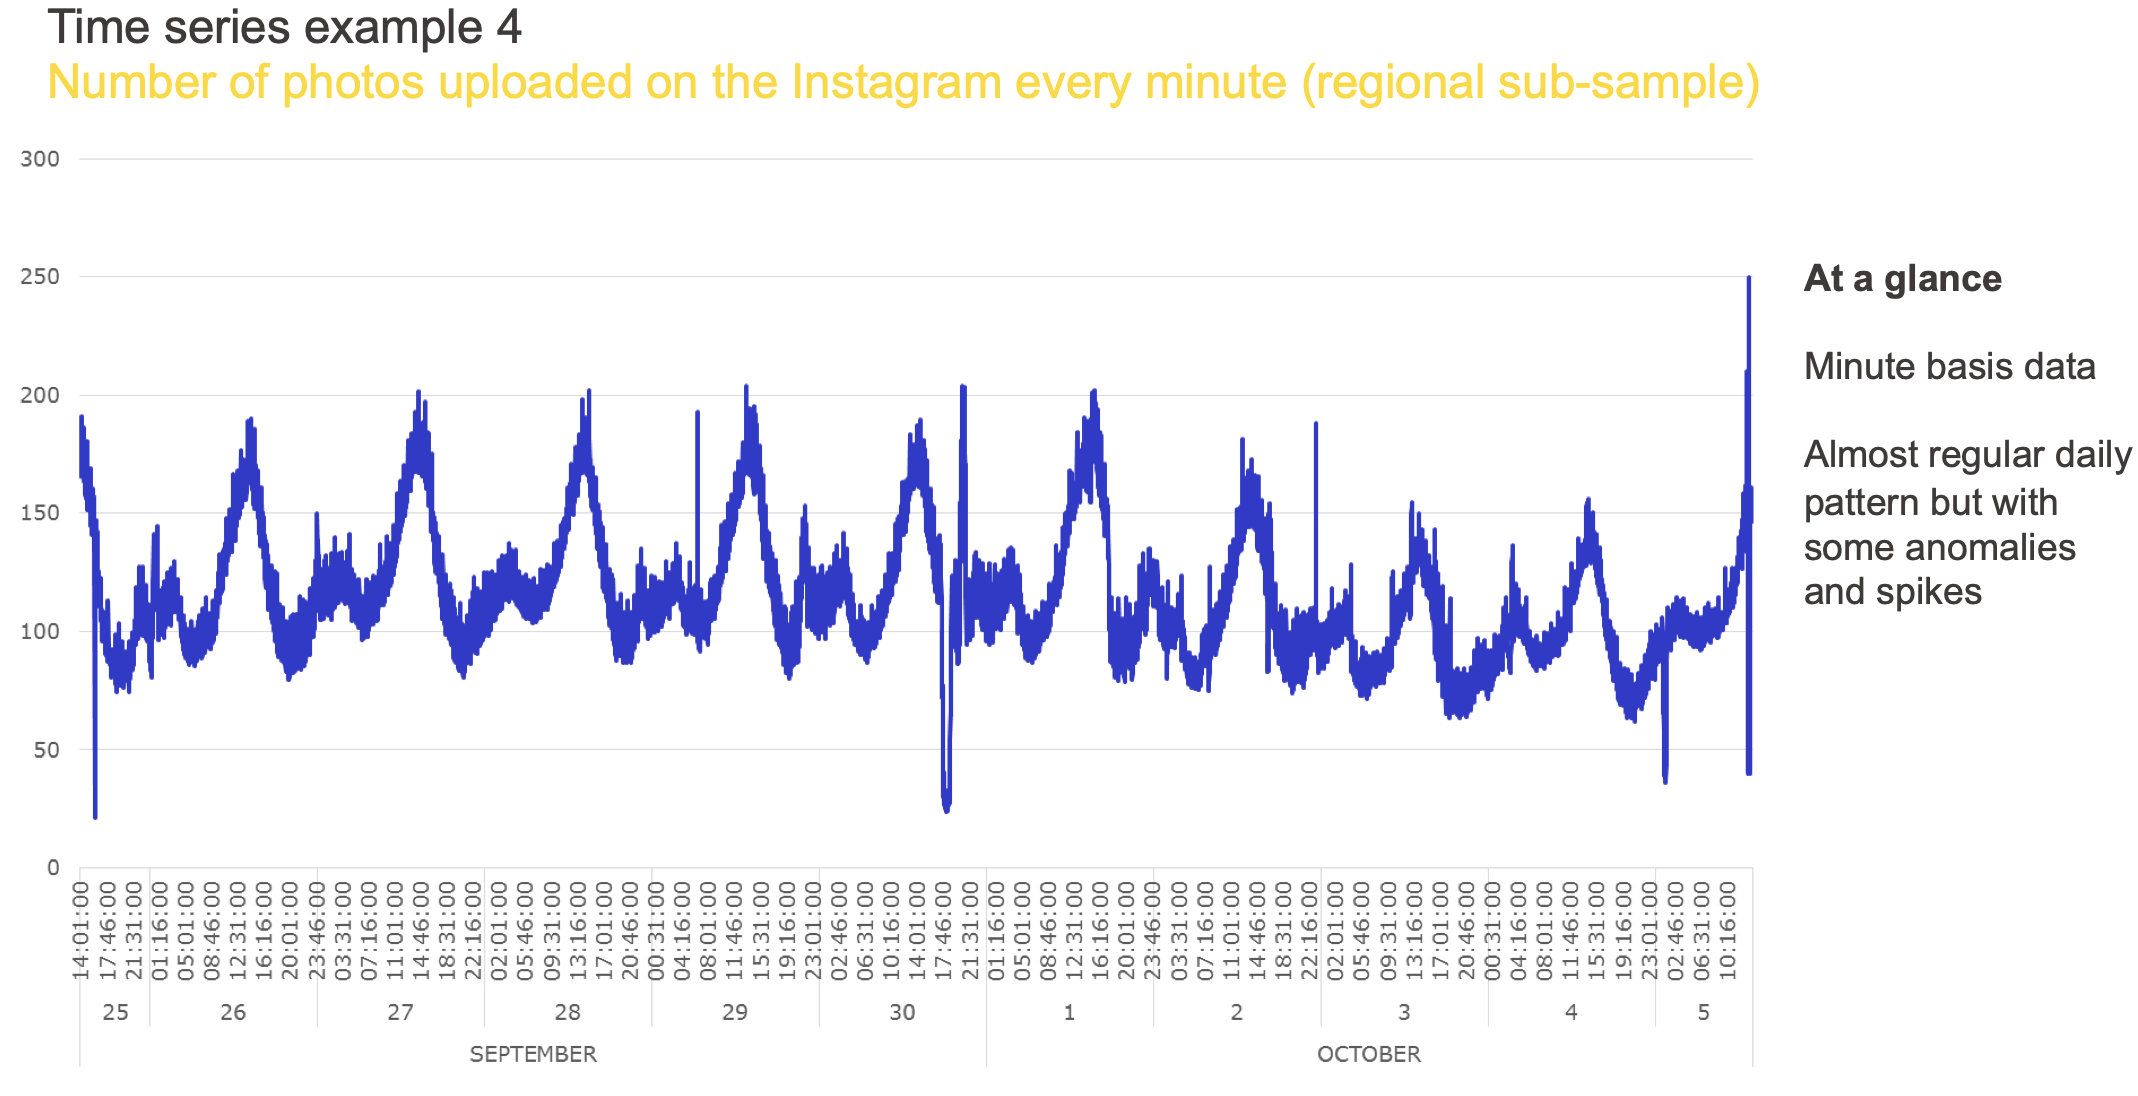



> Time series analysis is about understanding data that’s collected over time.
think of data points that are captured in sequence, typically at equally spaced intervals.

**What are the goals of time series analysis?**

- summary description of the data
- interpretation
- forecasting

**Applications of Time Series Analysis**


- Stock Market Prediction:
- Electricity demand Forecasting:
- Weather Forecasting:


**Understanding the Components of Time Series**

- **Trend(linera vs non-linear)**: A trend is the long-term direction in your data. Trends can be upward, downward, or even flat, and understanding the trend in your data can help you make sense of the bigger picture.

- **Seasonality**: patterns that repeat at regular intervals, usually within a year. e.g. December always has higher sales — this is seasonality at work.

- **Cyclical Patterns**: similar to seasonality, but they occur over longer periods and aren’t tied to a specific time frame like seasons. Think of economic cycles, which can last several years e.g. recession

- **Irregular/Noise Component**: the random variation in your data that doesn’t follow a pattern e.g sudden spikes or drops in voltage. While you can’t predict noise, understanding its presence is crucial because it affects the accuracy of your forecasts. You’ll often smooth out noise to focus on the more predictable components like trend and seasonality. - give generator detection example.

**Example Breakdown**

- **Trend**: You notice that overall, sales have been increasing by about 5% each year.
- **Seasonality**: Every December, there’s a significant spike in sales due to holiday shopping.
- **Cyclical**: Every two years, there’s a slight dip in sales that corresponds with a broader economic downturn.
- **Noise**: Despite these patterns, there are random fluctuations, like a sudden drop in sales one month due to a website outage.


**Key Concepts in Time Series Analysis**

- **Autocorrelation**: Autocorrelation measures the relationship between a time series and a lagged version of itself. In simpler terms, it tells you how much past values influence current values.

- **Partial Autocorrelation**: focuses on the relationship between the current point and a specific lag, removing the influence of other intermediate points. This is particularly useful when you’re trying to build models like ARIMA, where you need to determine the order of the autoregressive term (AR). For instance, if you’re seeing strong partial autocorrelation at lag 1 but not at lag 2 or 3, it suggests that only the previous value has a direct influence on the current one.

- **Stationarity** and **random walk**: Stationary data has consistent statistical properties — like mean and variance — over time. Why is this important? Most time series models, especially those in the ARIMA family, assume that the data is stationary.

- **Lag and moving average**: A lag is simply a previous observation in the time series. A moving average smooths out fluctuations in your data by averaging a certain number of previous data points. For instance, if you’re looking at a 5-day moving average of stock prices, each point in your moving average series is the average of the previous 5 days’ prices. This helps to remove noise and highlight the underlying trend.


**Modeling for Time Series**
- LSTM model
- ARIMA and SARIMA models


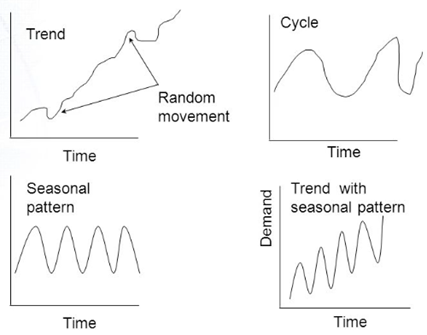

[source](https://medium.com/@ritusantra/what-is-time-series-and-components-of-time-series-c80b69ad5cb9)

## **Assignment**

#### **Assignment instructions**

- How to make the submission:
  - Within your public GitHub repository created for KamiLimu Data Science Assignments, create a branch named **firstname_statistical_analysis** [*firstname* is your first name]
  - Working from this branch:
      - create a directory named **statistical_analysis**
      - create a .ipynb file (where you will complete this assignment) and push it to the **statistical_analysis** directory.
      - create a pull request (PR)
      - invite **@m0odero**, **@RyanSmoak**, **@EverlynAsiko** as reviewers to the PR
- The code should be well documented - inline comments and docstrings
- Use Python library `scipy` and any other relevant libraries as needed to complete this assignment. Do not import a library that you do not use.

- Submit the assignment **by July 18th, 2025**

> Once your assignment has been reviewed and approved, merge to main branch 🎈

Both sections 1 and 2 are compulsory:

For section 2, you will use the **Athletes** dataset


First, load the dataset:

```
import pandas as pd

athletes = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-27/athlete_events.csv")
```

### **Section 1**

1. In inferential statistics, we attempt to draw a conclusion about a population from sample data. Define the two terms:

    a. sample

    b. population

2. When we estimate an unknown population value using a confidence interval, what does the confidence interval tell us?
3. What is a hypothesis?
4. Describe the two types of hypothesis. Give an example for each.
5. What is hypothesis testing? Which of the two types of hypothesis do we test in hypothesis testing?
6. Describe the step-by-step process for hypothesis testing.
7. What is alpha in hypothesis testing?
8. How does the p-value obtained from hypothesis testing relate to alpha?
9. When selecting which statistical test to use in hypothesis testing, what assumptions do we make about the data for a parametric test?
10. Name one test used to determine whether a datset is a normal distribution.

### **Section 2**

Are male and female olympic athletes the same height on average?

Use the dataset to test whether the average height of male and female olympic athletes is significantly different. Use the significance level of (α = 0.05)

Steps to follow:

a. State the hypotheses. Define the null and alternative hypotheses.

b. We have already chosen the significance level of (α = 0.05). So the next step is to choose the appropriate statistical test: consider whether the data is numerical or categorical, whether the groups are independent, and the number of groups. Also test for normality of the data as well as equality of variance.

c. State the justifications for your choice for a statistical test.

d. Prepare the data. Handle missing values and filter for male and female athletes with valid height entries.

e. Conduct the statistical test.

f. Compute the test statistic and p-value.

g. Make a decision: interpret the p-value and state whether you reject or fail to reject the null hypothesis.
